In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('../Dataset/abu_dhabi.csv')  # Change to your filename

In [4]:
X = df[['lat','lng']].values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
from sklearn.cluster import KMeans
k = 15
colors = [
    'red', 'blue', 'green', 'purple', 'orange',
    'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen',
    'cadetblue', 'darkpurple', 'pink', 'gray', 'black'
]
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [6]:
# convert centers back to original scale
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=['lat','lng'])
print(centers_df)


          lat        lng
0   24.423750  54.451781
1   24.318763  54.631021
2   24.421133  54.589210
3   24.325440  54.483909
4   24.556162  54.675474
5   24.467711  54.355129
6   24.413465  54.518830
7   24.270905  54.565080
8   24.382119  54.669154
9   24.265176  54.652135
10  24.511252  54.395014
11  24.443974  54.394419
12  24.367211  54.500926
13  24.336036  54.550332
14  24.477849  54.628326


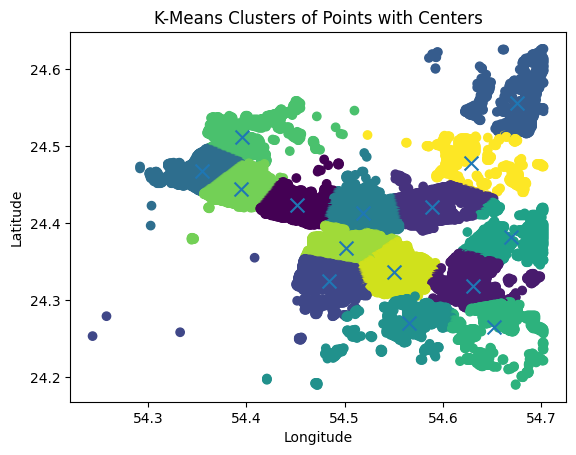

In [7]:
import matplotlib.pyplot as plt

# Assuming `df` has columns ['lat','lng','cluster']
# and `centers_df` is your DataFrame of cluster centers with ['lat','lng']

plt.figure()
# scatter all points, coloring by their assigned cluster
plt.scatter(df['lng'], df['lat'], c=df['cluster'])

# mark the cluster centers
plt.scatter(centers_df['lng'], centers_df['lat'], marker='x', s=100)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clusters of Points with Centers')
plt.show()

# Weighted K-Means

In [9]:
import os
from pathlib import Path

         lat        lng  cluster
0  24.625833  54.700833        3
1  24.625833  54.701666        3
2  24.625833  54.702500        3
3  24.625000  54.660833        3
4  24.625000  54.661666        3
Files written to: /Users/epameinondasdouros/Personal/Quantum/Quantum_NYUAD_Hackathon/On_Site_Code/AI/Abu_Dhabi/abu_dhabi_10


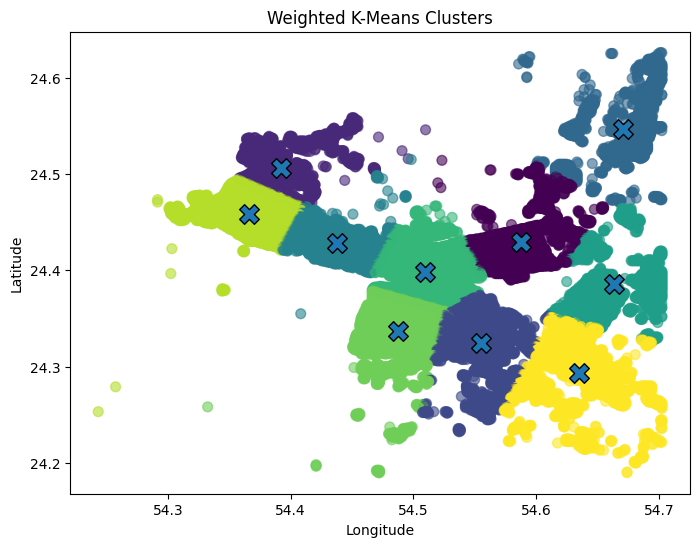

         lat        lng  cluster
0  24.625833  54.700833        3
1  24.625833  54.701666        3
2  24.625833  54.702500        3
3  24.625000  54.660833        3
4  24.625000  54.661666        3
Files written to: /Users/epameinondasdouros/Personal/Quantum/Quantum_NYUAD_Hackathon/On_Site_Code/AI/Abu_Dhabi/abu_dhabi_15


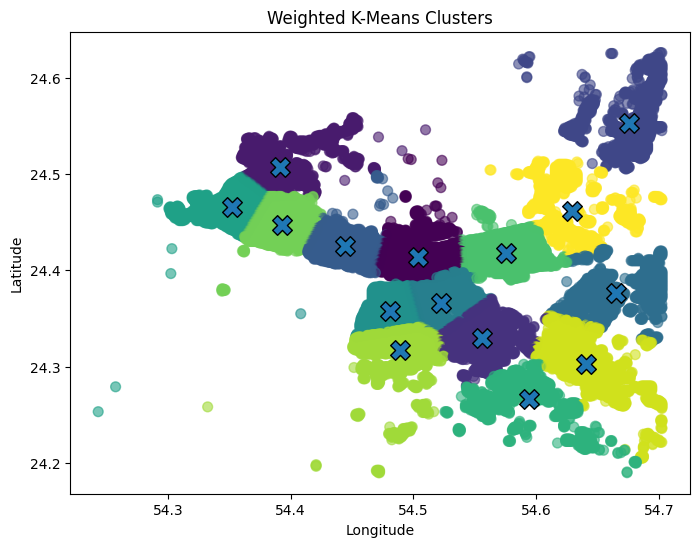

         lat        lng  cluster
0  24.625833  54.700833        3
1  24.625833  54.701666        3
2  24.625833  54.702500        3
3  24.625000  54.660833        3
4  24.625000  54.661666        3
Files written to: /Users/epameinondasdouros/Personal/Quantum/Quantum_NYUAD_Hackathon/On_Site_Code/AI/Abu_Dhabi/abu_dhabi_20


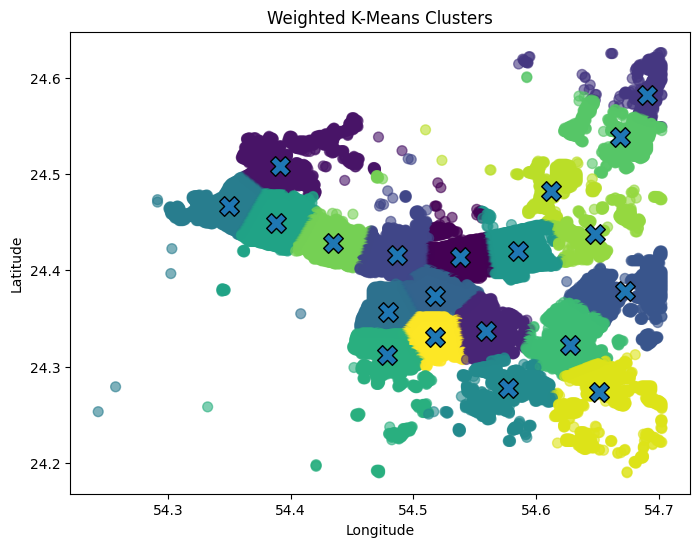

         lat        lng  cluster
0  24.625833  54.700833       20
1  24.625833  54.701666       20
2  24.625833  54.702500       20
3  24.625000  54.660833       20
4  24.625000  54.661666       20
Files written to: /Users/epameinondasdouros/Personal/Quantum/Quantum_NYUAD_Hackathon/On_Site_Code/AI/Abu_Dhabi/abu_dhabi_25


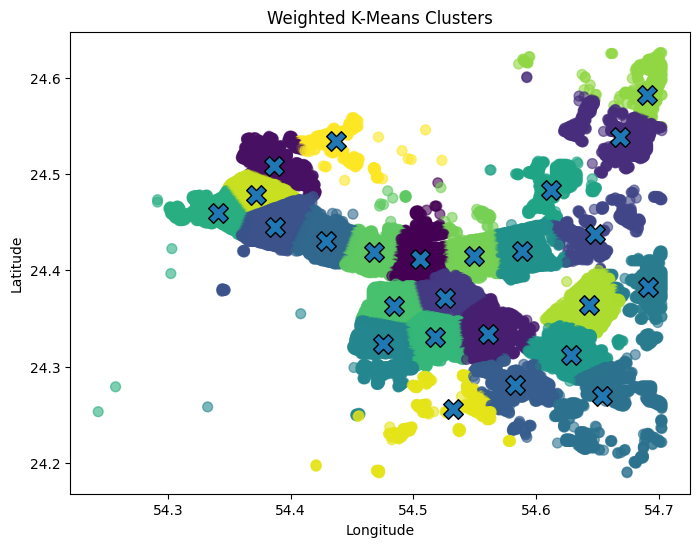

         lat        lng  cluster
0  24.625833  54.700833       20
1  24.625833  54.701666       20
2  24.625833  54.702500       20
3  24.625000  54.660833       20
4  24.625000  54.661666       20
Files written to: /Users/epameinondasdouros/Personal/Quantum/Quantum_NYUAD_Hackathon/On_Site_Code/AI/Abu_Dhabi/abu_dhabi_40


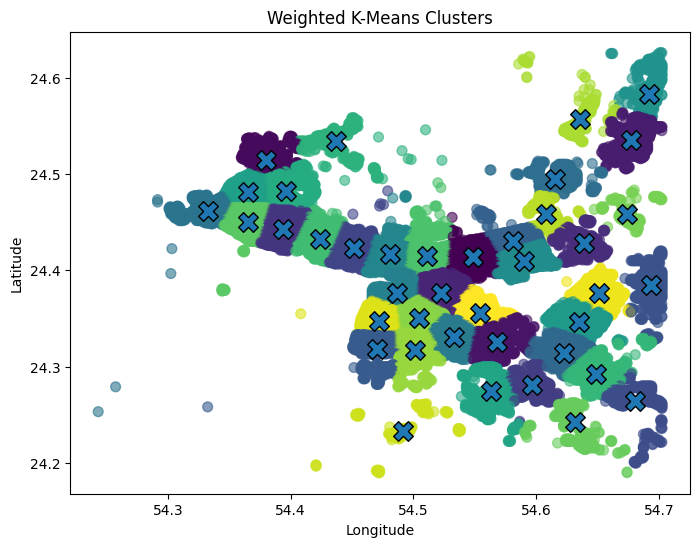

         lat        lng  cluster
0  24.625833  54.700833       20
1  24.625833  54.701666       20
2  24.625833  54.702500       20
3  24.625000  54.660833       20
4  24.625000  54.661666       20
Files written to: /Users/epameinondasdouros/Personal/Quantum/Quantum_NYUAD_Hackathon/On_Site_Code/AI/Abu_Dhabi/abu_dhabi_50


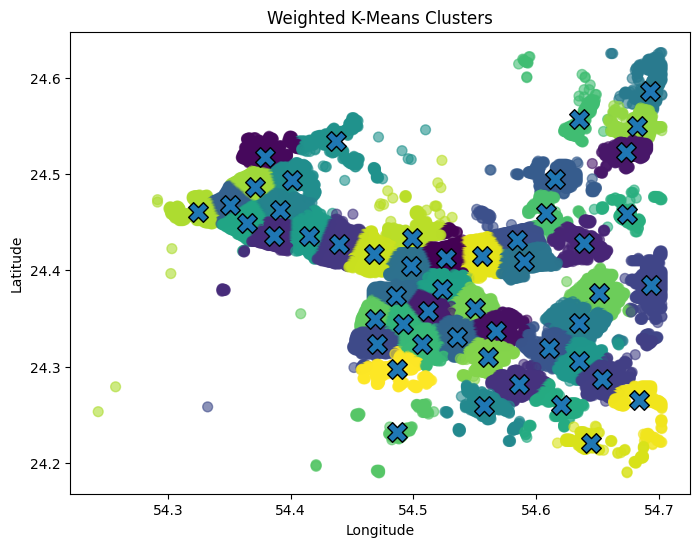

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_values=[10,15,20,25,40,50]

for k in k_values:
    X = df[['lat','lng']].values
    w=df['pop'].values

    kmeans_w = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_w.fit(X, sample_weight=w)         # pass your pop column here
    labels = kmeans_w.predict(X)             # or just use kmeans.labels_
    centers = kmeans_w.cluster_centers_

    # X[:,0]=lat, X[:,1]=lng
    labels = kmeans_w.labels_
    centers = kmeans_w.cluster_centers_

    df_final = pd.DataFrame(
        X,
        columns=['lat','lng']
    )
    df_final['cluster'] = labels

    print(df_final.head())

    folder = Path(f"Abu_Dhabi/abu_dhabi_{k}")   # e.g. dubai_50
    folder.mkdir(parents=True, exist_ok=True)

    df_final.to_csv(folder / "clusters.csv", index=False)

    centers_df = pd.DataFrame(centers, columns=["lat_center", "lng_center"])
    centers_df.to_csv(folder / "centers.csv", index=False)

    print(f"Files written to: {folder.resolve()}")

    import matplotlib.pyplot as plt

    # X[:,0]=lat, X[:,1]=lng
    labels = kmeans_w.labels_
    centers = kmeans_w.cluster_centers_

    plt.figure(figsize=(8,6))
    # plot each point colored by its cluster
    plt.scatter(
        X[:,1], X[:,0],
        c=labels,
        s=50,
        alpha=0.6
    )
    # mark cluster centers
    plt.scatter(
        centers[:,1], centers[:,0],
        marker='X',
        s=200,
        edgecolor='black'
    )

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Weighted K-Means Clusters')
    plt.show()


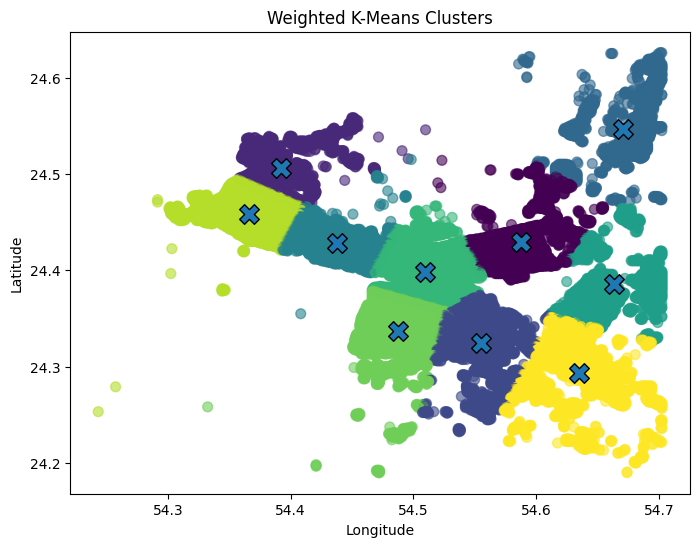

In [31]:
import matplotlib.pyplot as plt

# X[:,0]=lat, X[:,1]=lng
labels = kmeans_w.labels_
centers = kmeans_w.cluster_centers_

plt.figure(figsize=(8,6))
# plot each point colored by its cluster
plt.scatter(
    X[:,1], X[:,0],
    c=labels,
    s=50,
    alpha=0.6
)
# mark cluster centers
plt.scatter(
    centers[:,1], centers[:,0],
    marker='X',
    s=200,
    edgecolor='black'
)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Weighted K-Means Clusters')
plt.show()


In [32]:
df_final = pd.DataFrame(
    X,
    columns=['lat','lng']
)
df_final['cluster'] = labels

print(df_final.head())

         lat        lng  cluster
0  24.625833  54.700833        3
1  24.625833  54.701666        3
2  24.625833  54.702500        3
3  24.625000  54.660833        3
4  24.625000  54.661666        3


In [33]:
import folium
from folium.plugins import MarkerCluster

m = folium.Map(
    location=[df['lat'].mean(), df['lng'].mean()],
    zoom_start=10
)

marker_cluster = MarkerCluster().add_to(m)

In [34]:
for idx, point in df_final.iterrows():
    c = int(point['cluster'])
    folium.Circle(
        location=(point['lat'], point['lng']),
        radius=1,
        color=colors[c % len(colors)],
        fill=True
    ).add_to(m)

for i in range(centers.shape[0]):
    # try both possible column names
    lat = centers[i][0]
    lng = centers[i][1]
    # build popup text
    popup = f"Center {idx}"
    folium.Marker(
        location=(lat, lng),
        icon=folium.Icon(color='black', icon='info-sign'),
        popup=popup
    ).add_to(m)

# 6️⃣ Save to HTML
m.save('abu_dhabi_10.html')
print("Interactive map written to point_cluster_map.html")

Interactive map written to point_cluster_map.html
